In [53]:
# Imports
%matplotlib inline
from __future__ import division
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)
import numpy as np
from IPython.html.widgets import interactive
from IPython.display import display, Audio
from scipy import signal
import matplotlib.pyplot as plt,mpld3
mpld3.enable_notebook()

### Step 1: 1-D Histogram

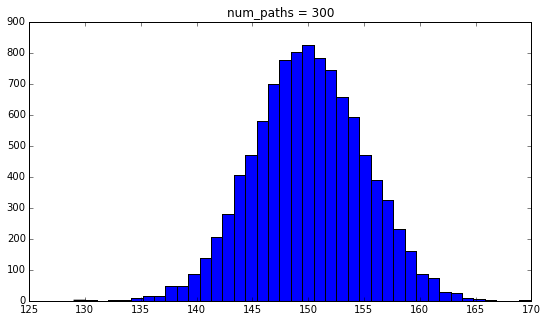

In [60]:
N = 10000
num_paths = 300
h_hat = np.zeros(N)

for k in range(num_paths):
    h_hat += np.random.rand(N)
    
plt.hist(h_hat,bins=40);
plt.title('num_paths = ' + str(num_paths));

### Step 2: 2-D

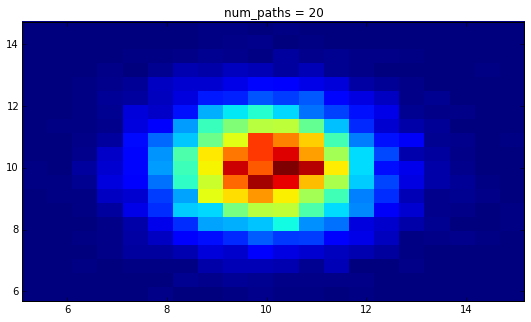

In [64]:
N = 10000
num_paths = 20
h_hat = np.zeros(N)+1j*np.zeros(N)

for k in range(num_paths):
    h_hat += np.random.rand(N) + 1j*np.random.rand(N)
    
plt.hist2d(np.real(h_hat),np.imag(h_hat),bins=20);
plt.title('num_paths = ' + str(num_paths));

### Step 3: Power Distribution (Chi Square)

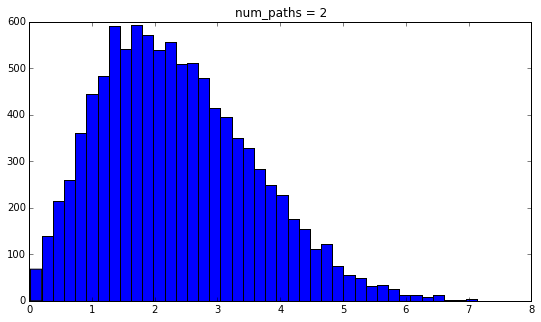

In [68]:
N = 10000
num_paths = 2
h_hat = np.zeros(N)+1j*np.zeros(N)

for k in range(num_paths):
    h_hat += np.random.rand(N) + 1j*np.random.rand(N)
    
plt.hist(abs(h_hat)**2,bins=40);
plt.title('num_paths = ' + str(num_paths));

### Step 4: Multipath as a Filter

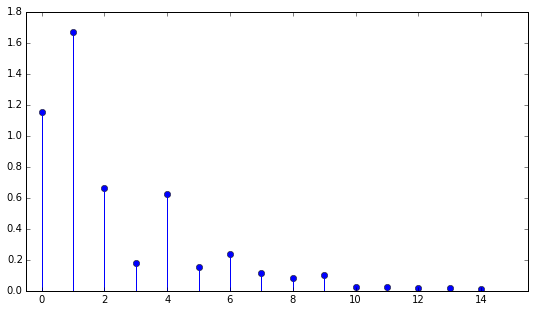

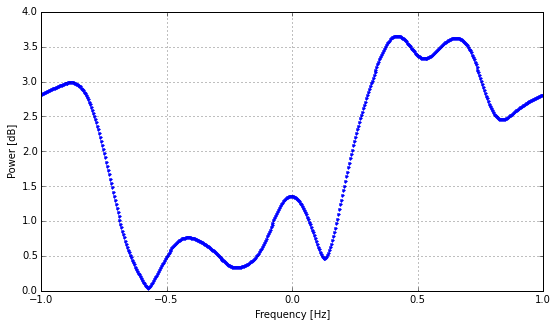

In [69]:
L = 15
h_non_exponential = np.random.randn(L) + 1j*np.random.randn(L)

alpha = 0.5
power_val = np.arange(L)

amplitude_envelope = np.sqrt(np.power(alpha,power_val))

h = h_non_exponential*amplitude_envelope

plt.figure(1)
plt.stem(abs(h))
plt.xlim([-.5,L+.5])

NFFT = 512

# Calculate DFT
spectrum = np.fft.fft(h,NFFT)

# DFT frequencies
freq = np.fft.fftfreq(NFFT)

# spectrum.size
# plot FFT
plt.figure(2)
plt.plot(freq*2,abs(spectrum), 'b.');
plt.ylabel('Power [dB]');
plt.xlabel('Frequency [Hz]');
plt.grid(True)



### Step 5: Make Interactive
Inputs
- channel length (L)
- falloff (alpha)

Outputs
- stem plot of impulse response
- frequency response

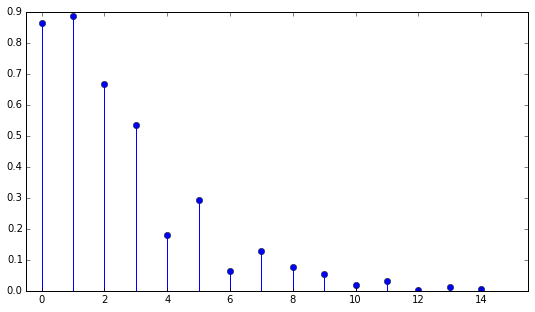

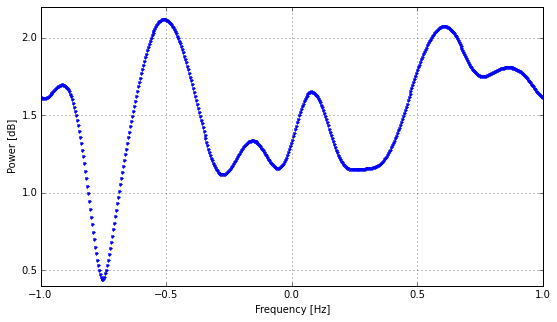

In [70]:
##########  Insert Code in this cell  ###########
def plot_MP_demo(L = 15, alpha = 0.5):  # add arguments and default values
    
#     L = 15
    h_non_exponential = np.random.randn(L) + 1j*np.random.randn(L)

#     alpha = 0.5
    power_val = np.arange(L)

    amplitude_envelope = np.sqrt(np.power(alpha,power_val))

    h = h_non_exponential*amplitude_envelope

    plt.figure(1)
    plt.stem(abs(h))
    plt.xlim([-.5,L+.5])

    NFFT = 512

    # Calculate DFT
    spectrum = np.fft.fft(h,NFFT)

    # DFT frequencies
    freq = np.fft.fftfreq(NFFT)

    # spectrum.size
    # plot FFT
    plt.figure(2)
    plt.plot(freq*2,abs(spectrum), 'b.');
    plt.ylabel('Power [dB]');
    plt.xlabel('Frequency [Hz]');
    plt.grid(True)



interactive(plot_MP_demo, L = (1,30), alpha = (.1, 1))  # add arguments and ranges